In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
#import joypy
import seaborn as sns
import spacy
import datetime
import os
import json
import re

%matplotlib inline

In [2]:
df08 = pd.read_csv('C:data/Beijing_PM2.5_2008_YTD.csv'
                   ,encoding='utf-8')
df08.head()

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,Beijing,PM2.5 - Principal,2008-01-01 01:00 AM,2008,1,1,1,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
1,Beijing,PM2.5 - Principal,2008-01-01 02:00 AM,2008,1,1,2,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
2,Beijing,PM2.5 - Principal,2008-01-01 03:00 AM,2008,1,1,3,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
3,Beijing,PM2.5 - Principal,2008-01-01 04:00 AM,2008,1,1,4,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
4,Beijing,PM2.5 - Principal,2008-01-01 05:00 AM,2008,1,1,5,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing


In [3]:
df09 = pd.read_csv('C:data/Beijing_PM2.5_2009_YTD.csv'
                   ,encoding='utf-8')
df10 = pd.read_csv('C:data/Beijing_PM2.5_2010_YTD.csv'
                   ,encoding='utf-8')
df11 = pd.read_csv('C:data/Beijing_PM2.5_2011_YTD.csv'
                   ,encoding='utf-8')
df12 = pd.read_csv('C:data/Beijing_PM2.5_2012_YTD.csv'
                   ,encoding='utf-8')
df13 = pd.read_csv('C:data/Beijing_PM2.5_2013_YTD.csv'
                   ,encoding='utf-8')
df14 = pd.read_csv('C:data/Beijing_PM2.5_2014_YTD.csv'
                   ,encoding='utf-8')
df15 = pd.read_csv('C:data/Beijing_PM2.5_2015_YTD.csv'
                   ,encoding='utf-8')
df16 = pd.read_csv('C:data/Beijing_PM2.5_2016_YTD.csv'
                   ,encoding='utf-8')
df17 = pd.read_csv('C:data/Beijing_PM2.5_2017_YTD.csv'
                   ,encoding='utf-8')
df18 = pd.read_csv('C:data/Beijing_PM2.5_2018_YTD.csv'
                   ,encoding='utf-8')
print(df18.shape)
df18.head()

(7296, 14)


,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,Beijing,PM2.5 - Principal,2018-01-01 01:00 AM,2018,1,1,1,69.3,158,Unhealthy,66.0,UG/M3,1 Hr,Valid
1,Beijing,PM2.5 - Principal,2018-01-01 02:00 AM,2018,1,1,2,53.1,144,Unhealthy for Sensitive Groups,37.0,UG/M3,1 Hr,Valid
2,Beijing,PM2.5 - Principal,2018-01-01 03:00 AM,2018,1,1,3,43.0,119,Unhealthy for Sensitive Groups,33.0,UG/M3,1 Hr,Valid
3,Beijing,PM2.5 - Principal,2018-01-01 04:00 AM,2018,1,1,4,35.5,101,Unhealthy for Sensitive Groups,28.0,UG/M3,1 Hr,Valid
4,Beijing,PM2.5 - Principal,2018-01-01 05:00 AM,2018,1,1,5,30.2,89,Moderate,25.0,UG/M3,1 Hr,Valid


In [4]:
#df_comb = df08.append(df09)
df_comb = pd.concat([df08, df09, df10, df11, df12, df13, df14, df15, df16, df17, df18])
print(df_comb.shape)
df_comb.tail()
df_comb = df_comb.reset_index(drop=True)
df_comb.tail()

(94968, 14)


,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
94963,Beijing,PM2.5 - Principal,2018-10-31 08:00 PM,2018,10,31,20,30.6,90,Moderate,38.0,UG/M3,1 Hr,Valid
94964,Beijing,PM2.5 - Principal,2018-10-31 09:00 PM,2018,10,31,21,47.3,130,Unhealthy for Sensitive Groups,64.0,UG/M3,1 Hr,Valid
94965,Beijing,PM2.5 - Principal,2018-10-31 10:00 PM,2018,10,31,22,54.6,148,Unhealthy for Sensitive Groups,62.0,UG/M3,1 Hr,Valid
94966,Beijing,PM2.5 - Principal,2018-10-31 11:00 PM,2018,10,31,23,61.8,154,Unhealthy,69.0,UG/M3,1 Hr,Valid
94967,Beijing,PM2.5 - Principal,2018-11-01 12:00 AM,2018,11,1,0,60.4,154,Unhealthy,59.0,UG/M3,1 Hr,Valid


#### Compare line counts of original data files using `$ wc -l <filename>` with shape of dataframe

Each smaller dataframe should have 4 fewer lines, accountings for data descriptions, spacings and headers

In [5]:
# Line check looks good!
8785 + 8761 + 8761 + 8761 + 8785 + 8761 + 8761 + 8761 + 8785 + 8761 + 7297 - 11 #(extra line at the end of each file)

94968

In [6]:
df_comb = df_comb.rename(columns={'Site':'site'
                        ,'Parameter':'parameter'
                        ,'Date (LT)':'date_lt'
                        ,'Year':'year'
                        ,'Month':'month'
                        ,'Day':'day'
                        ,'Hour':'hour'
                        ,'NowCast Conc.':'nowcast_conc'
                        ,'AQI':'aqi'
                        ,'AQI Category':'aqi_category'
                        ,'Raw Conc.':'raw_conc'
                        ,'Conc. Unit':'conc_unit'
                        ,'Duration':'duration'
                        ,'QC Name':'qc_name'})
df_comb.head()

,site,parameter,date_lt,year,month,day,hour,nowcast_conc,aqi,aqi_category,raw_conc,conc_unit,duration,qc_name
0,Beijing,PM2.5 - Principal,2008-01-01 01:00 AM,2008,1,1,1,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
1,Beijing,PM2.5 - Principal,2008-01-01 02:00 AM,2008,1,1,2,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
2,Beijing,PM2.5 - Principal,2008-01-01 03:00 AM,2008,1,1,3,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
3,Beijing,PM2.5 - Principal,2008-01-01 04:00 AM,2008,1,1,4,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
4,Beijing,PM2.5 - Principal,2008-01-01 05:00 AM,2008,1,1,5,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing


In [ ]:
df_comb

In [7]:
print(df_comb.groupby('qc_name').size())
print('\nPercent values missing: ', round(6765.0/94968, 3))
print('Percent values invalid: ', round(4037.0/94968, 3)) # negative raw_conc
print('Percent values valid: ', round(84166.0/94968, 3))

qc_name
Invalid     4037
Missing     6765
Valid      84166
dtype: int64

Percent values missing:  0.071
Percent values invalid:  0.043
Percent values valid:  0.886


In [8]:
df_comb.groupby(['qc_name','year']).size()

qc_name  year
Invalid  2008     866
         2009     853
         2010     669
         2011     728
         2012     489
         2013      52
         2014      65
         2015      38
         2016      17
         2017     111
         2018     149
Missing  2008    3096
         2009    1128
         2013      28
         2014      33
         2015      54
         2016       8
         2017      30
         2018    2388
Valid    2008    4821
         2009    6779
         2010    8091
         2011    8032
         2012    8295
         2013    8680
         2014    8662
         2015    8668
         2016    8759
         2017    8619
         2018    4760
dtype: int64

##### Yearly average coming down over time, from a  peak in 2013

In [60]:
yr_avg_aqi = df_comb[df_comb.qc_name == 'Valid'].groupby('year')['aqi'].mean().reset_index()
yr_avg_aqi.head()

,year,aqi
0,2008,143.668119
1,2009,160.536067
2,2010,163.716228
3,2011,154.911106
4,2012,149.663894


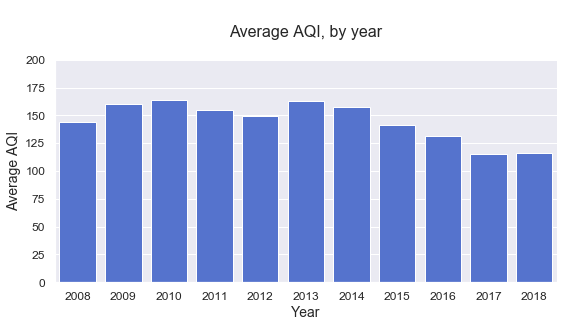

In [66]:
sns.set(style="darkgrid", color_codes=True)

f = sns.factorplot(x="year", y="aqi", data=yr_avg_aqi, kind="bar", aspect=2, size=4, color="royalblue", legend=False
              )

plt.title('\nAverage AQI, by year\n', size=16)
plt.xlabel('Year', size=14)
plt.ylabel('Average AQI', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.ylim(0,200)
f.savefig(os.getcwd() + '/img/yr_avg_aqi.png')

##### Winter months tend to be worse, with November highest

In [62]:
mo_avg_aqi = df_comb[df_comb.qc_name == 'Valid'].groupby('month')['aqi'].mean().reset_index()
mo_avg_aqi.head()

,month,aqi
0,1,154.669622
1,2,153.594247
2,3,148.505645
3,4,139.755532
4,5,140.362413


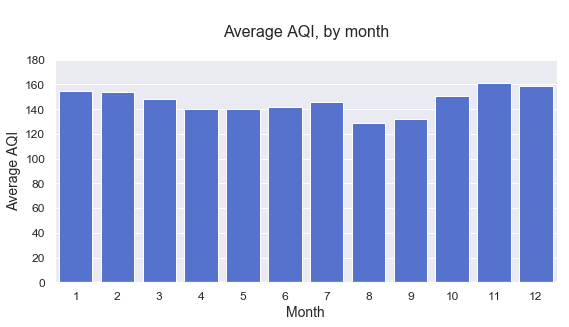

In [68]:
sns.set(style="darkgrid", color_codes=True)

f = sns.factorplot(x="month", y="aqi", data=mo_avg_aqi, kind="bar", aspect=2, size=4, color="royalblue", legend=False
              )

plt.title('\nAverage AQI, by month\n', size=16)
plt.xlabel('Month', size=14)
plt.ylabel('Average AQI', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.ylim(0,180)
f.savefig(os.getcwd() + '/img/mo_avg_aqi.png')

##### Pollution tends to be worse at night, as average levels start to rise starting between 4pm and 5pm and staying elevated until 5am or so

In [73]:
hr_avg_aqi = df_comb[df_comb.qc_name == 'Valid'].groupby('hour')['aqi'].mean().reset_index()
hr_avg_aqi.head()

,hour,aqi
0,0,149.494456
1,1,159.424113
2,2,158.056093
3,3,157.377049
4,4,154.702098


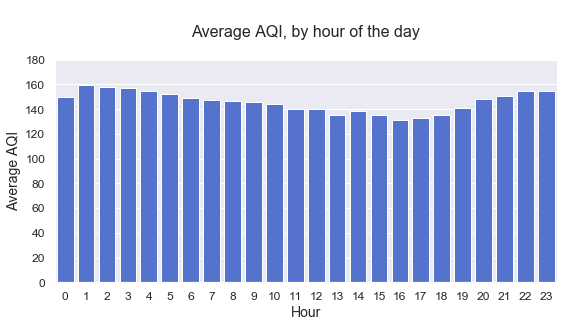

In [76]:
sns.set(style="darkgrid", color_codes=True)

f = sns.factorplot(x="hour", y="aqi", data=hr_avg_aqi, kind="bar", aspect=2, size=4, color="royalblue", legend=False
              )

plt.title('\nAverage AQI, by hour of the day\n', size=16)
plt.xlabel('Hour', size=14)
plt.ylabel('Average AQI', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.ylim(0,180)
f.savefig(os.getcwd() + '/img/hr_avg_aqi.png')

#### Fill missing AQI values, and convert date field to datetime type

In [95]:
df_comb.groupby(['qc_name','aqi']).size()
# how to treat valid values that are negative? just code as missing? so filter on 'value' < 0

qc_name  aqi  
Invalid  4.0      1
         19.0     1
         20.0     3
         25.0     1
         27.0     1
         30.0     6
         31.0     1
         32.0     1
         33.0     3
         38.0     1
         40.0     5
         41.0     1
         42.0     1
         43.0     1
         44.0     1
         45.0     4
         46.0     1
         47.0     1
         48.0     4
         49.0     2
         50.0     3
         51.0     1
         52.0     7
         55.0     6
         57.0     1
         58.0     5
         59.0     3
         60.0     5
         63.0     5
         64.0     4
                 ..
Valid    567.0    1
         569.0    1
         570.0    1
         573.0    1
         574.0    1
         579.0    1
         583.0    1
         585.0    3
         587.0    1
         591.0    2
         592.0    1
         593.0    1
         595.0    1
         598.0    1
         602.0    1
         603.0    1
         636.0    1
         645.0    1
     

In [80]:
def fill_missing(x):
    if x < 0:
        return None
    else:
        return x
    
a = fill_missing(-1)
print(a)

None


In [98]:
df_comb['aqi'] = df_comb.aqi.apply(fill_missing)
df_comb[df_comb.qc_name == 'Missing'] #looks good
df_comb['date_lt'] = pd.to_datetime(df_comb.date_lt)
df_comb.head()

,site,parameter,date_lt,year,month,day,hour,nowcast_conc,aqi,aqi_category,raw_conc,conc_unit,duration,qc_name
0,Beijing,PM2.5 - Principal,2008-01-01 01:00:00,2008,1,1,1,-999.0,NaN,NaN,-999.0,UG/M3,1 Hr,Missing
1,Beijing,PM2.5 - Principal,2008-01-01 02:00:00,2008,1,1,2,-999.0,NaN,NaN,-999.0,UG/M3,1 Hr,Missing
2,Beijing,PM2.5 - Principal,2008-01-01 03:00:00,2008,1,1,3,-999.0,NaN,NaN,-999.0,UG/M3,1 Hr,Missing
3,Beijing,PM2.5 - Principal,2008-01-01 04:00:00,2008,1,1,4,-999.0,NaN,NaN,-999.0,UG/M3,1 Hr,Missing
4,Beijing,PM2.5 - Principal,2008-01-01 05:00:00,2008,1,1,5,-999.0,NaN,NaN,-999.0,UG/M3,1 Hr,Missing


##### Edit into a prettier graph

In [108]:
dates = [df_comb.date_lt.values]
dates[:5]

[array(['2008-01-01T01:00:00.000000000', '2008-01-01T02:00:00.000000000',
        '2008-01-01T03:00:00.000000000', ...,
        '2018-10-31T22:00:00.000000000', '2018-10-31T23:00:00.000000000',
        '2018-11-01T00:00:00.000000000'], dtype='datetime64[ns]')]

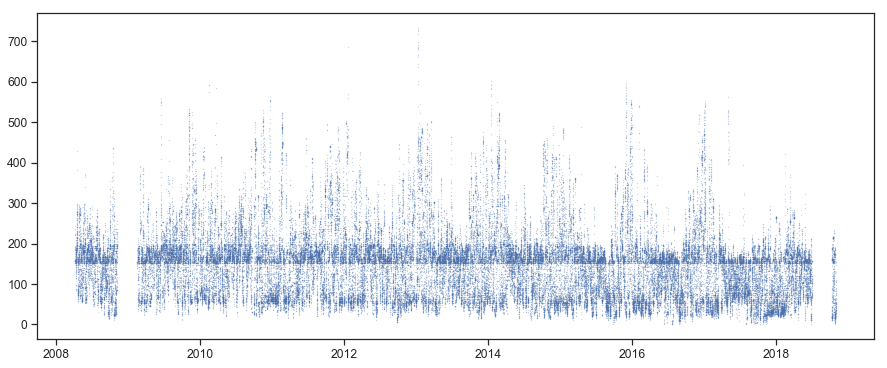

In [112]:
y = df_comb.aqi

plt.figure(figsize=(15,6))
plt.scatter(dates, y, alpha=0.5, s=.05)
plt.show()

##### Trying to recreate this graph produced by [Quartz](https://qz.com/197786/six-years-of-bejing-air-pollution-summed-up-in-one-scary-chart/)

![Graph from Quartz](https://github.com/yontartu/wuran/raw/master/img/quartz.png)

In [18]:
df_comb['dt'] = pd.to_datetime(df_comb.dt)
df_comb.head()

,site,parameter,dt,year,month,day,hour,value,duration,qc_name,unit,val
0,Beijing,PM2.5,2008-04-08 15:00:00,2008,4,8,15,207,1 Hr,Valid,micrograms per sq meter,207.0
1,Beijing,PM2.5,2008-04-08 16:00:00,2008,4,8,16,180,1 Hr,Valid,micrograms per sq meter,180.0
2,Beijing,PM2.5,2008-04-08 17:00:00,2008,4,8,17,152,1 Hr,Valid,micrograms per sq meter,152.0
3,Beijing,PM2.5,2008-04-08 18:00:00,2008,4,8,18,162,1 Hr,Valid,micrograms per sq meter,162.0
4,Beijing,PM2.5,2008-04-08 19:00:00,2008,4,8,19,171,1 Hr,Valid,micrograms per sq meter,171.0


In [19]:
m = pd.DataFrame({'max_pm25':df_comb.groupby(df_comb.dt.apply(lambda x: x.date()))['val'].max()}).reset_index()
print(m.shape)
m.tail()

(3316, 2)


,dt,max_pm25
3311,2017-06-26,43.0
3312,2017-06-27,101.0
3313,2017-06-28,104.0
3314,2017-06-29,110.0
3315,2017-06-30,90.0


Concentration (ug/m^3) to AQI conversion taken from [AQICN](http://aqicn.org/calculator)

![Screenshot from aqicn.org](https://github.com/yontartu/wuran/raw/master/img/aqicn.png)

In [20]:
#0		12		35.5		55.5		150.5		250.5		350.5		500.5
a = m[m.max_pm25 <= 12]
b = m[(m.max_pm25 > 12) & (m.max_pm25 <= 35.5)]
c = m[(m.max_pm25 > 35.5) & (m.max_pm25 <= 55.5)]
d = m[(m.max_pm25 > 55.5) & (m.max_pm25 <= 150.5)]
e = m[(m.max_pm25 > 150.5) & (m.max_pm25 <= 250.5)]
f = m[(m.max_pm25 > 250.5) & (m.max_pm25 <= 500.5)]
#f = m[(m.max_pm25 > 250.5) & (m.max_pm25 <= 350.5)]
#g = m[(m.max_pm25 > 350.5) & (m.max_pm25 <= 500.5)]

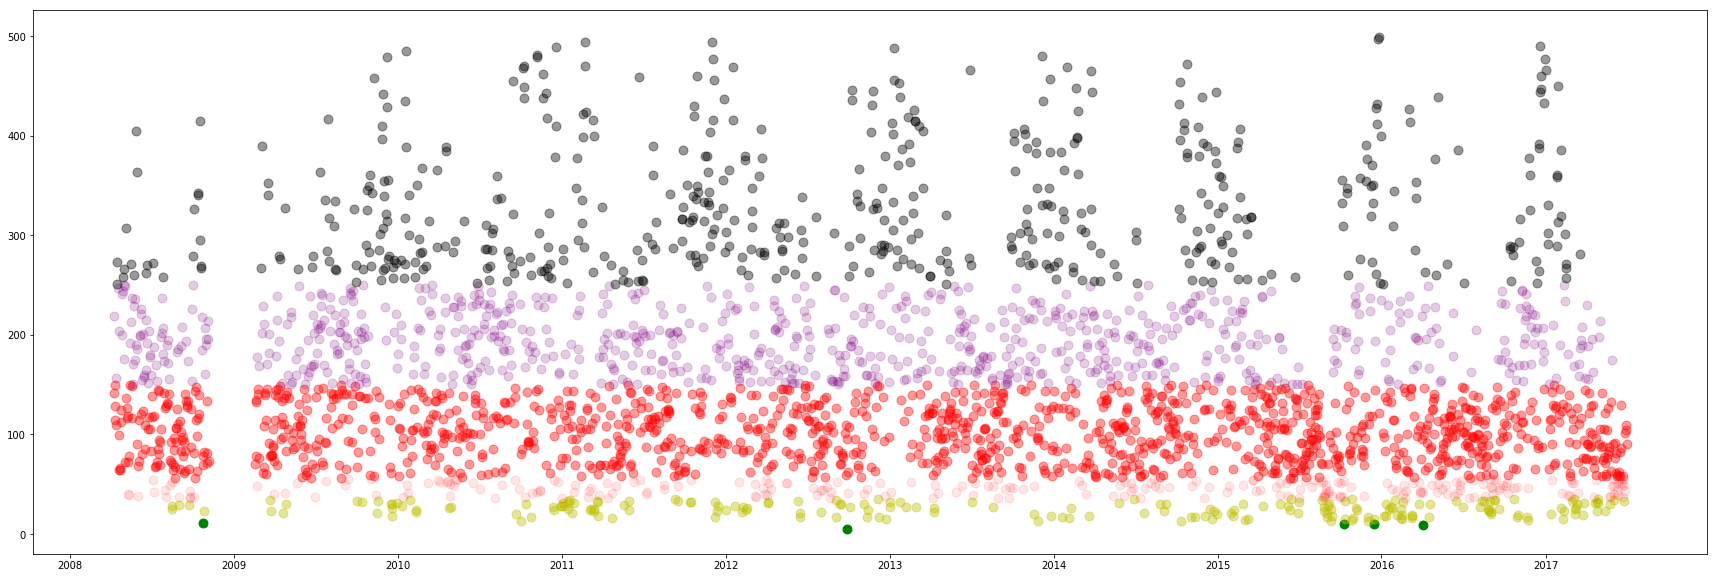

In [21]:
days = [pd.to_datetime(date) for date in m.dt]
days[:5]

plt.figure(figsize=(30,10))
plt.scatter(list(a.dt), a.max_pm25, alpha=1.0, s=80, c='g')
plt.scatter(list(b.dt), b.max_pm25, alpha=0.4, s=80, c='y')
plt.scatter(list(c.dt), c.max_pm25, alpha=0.1, s=80, c='r')
plt.scatter(list(d.dt), d.max_pm25, alpha=0.4, s=80, c='r')
plt.scatter(list(e.dt), e.max_pm25, alpha=0.2, s=80, c='purple')
plt.scatter(list(f.dt), f.max_pm25, alpha=0.4, s=80, c='black')
#plt.scatter(list(g.dt), g.max_pm25, alpha=0.4, s=80, c='black')
plt.show()

In [22]:
def gen_aqi_buckets(x):
    if x >= 0 and x <= 12:
        return "Good"
    elif x > 12 and x <= 35.5:
        return "Moderate"
    elif x > 35.5 and x <= 55.5:
        return "Unhealthy for Sensitive Groups"
    elif x > 55.5 and x <= 150.5:
        return "Unhealthy"
    elif x > 150.5 and x <= 250.5:
        return "Very Unhealthy"
    elif x > 250.5 and x <= 350.5:
        return "Hazardous"
    #elif x > 350.5 and x <= 500.5:
    #    return "Very Hazardous"
    elif x > 500.5:
        return "Literally off the charts"
    else:
        return "Not a valid AQI value"
    
a = gen_aqi_buckets(-1)
print(a)

Not a valid AQI value


In [23]:
m.head()
m.shape

m.max_pm25.apply(gen_aqi_buckets).head()
m['aqi_bucket'] = m.max_pm25.apply(gen_aqi_buckets)
m['year'] = pd.DatetimeIndex(m.dt).year
m['month'] = pd.DatetimeIndex(m.dt).month
c = m.groupby([m.year, m.aqi_bucket])['max_pm25'].count().unstack()
c[['Good','Moderate','Unhealthy for Sensitive Groups','Unhealthy','Very Unhealthy','Hazardous','Literally off the charts']]

aqi_bucket,Good,Moderate,Unhealthy for Sensitive Groups,Unhealthy,Very Unhealthy,Hazardous,Literally off the charts
year,,,,,,,
2008,1.0,5.0,14.0,104.0,66.0,18.0,1.0
2009,NaN,13.0,10.0,121.0,94.0,42.0,8.0
2010,NaN,14.0,26.0,122.0,107.0,49.0,10.0
2011,NaN,27.0,19.0,141.0,83.0,54.0,4.0
2012,1.0,23.0,25.0,132.0,107.0,49.0,3.0
2013,NaN,12.0,19.0,147.0,103.0,43.0,12.0
2014,NaN,18.0,21.0,153.0,100.0,38.0,8.0
2015,2.0,33.0,38.0,171.0,64.0,31.0,9.0
2016,1.0,38.0,45.0,171.0,67.0,20.0,7.0


In [24]:
s = pd.DataFrame({'count':c.stack()}).reset_index()
s.head()

,year,aqi_bucket,count
0,2008,Good,1.0
1,2008,Hazardous,18.0
2,2008,Literally off the charts,1.0
3,2008,Moderate,5.0
4,2008,Not a valid AQI value,3.0


Is the number of **"Good"** and **"Moderate"** days increasing or decreasing? What about the number of **"Unhealthy"** and **"Hazardous"** days?

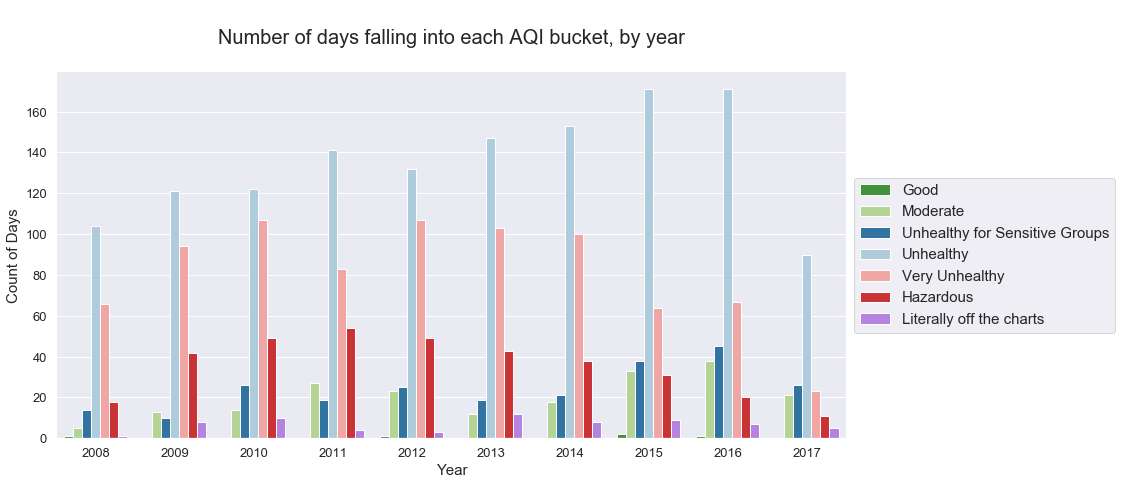

In [25]:
sns.set(style="darkgrid", color_codes=True)

p = sns.set_palette([
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.706, 0.459, 0.937)
])


f = sns.factorplot(x="year", y="count", hue="aqi_bucket", data=s, kind="bar", aspect=2, size=6
               , hue_order=['Good','Moderate','Unhealthy for Sensitive Groups','Unhealthy','Very Unhealthy','Hazardous'
                            ,'Literally off the charts']
               , palette=p
               , legend=False
              )

plt.title('\nNumber of days falling into each AQI bucket, by year\n', size=20)
plt.xlabel('Year', size=15)
plt.ylabel('Count of Days', size=15)
plt.xticks(size=13)
plt.yticks(size=13)
plt.legend(loc='center right', bbox_to_anchor=(1.35, 0.5), fontsize=15)
f.savefig(os.getcwd() + '/img/aqi_buckets.png')

You want to be comparing the greens and blues with the reds and purples over time. There are nearly *__zero__* "good" days across the time period, and also few "moderate" days. The number of "moderate" days have increased ever so slightly, as have "unhealthy for sensitive groups". Every year, a plurality of days are "unhealthy", likely due to the wide concentration range for this category (concentrations between 55.5 and 150.5 are considered "unhealthy"). "Very unhealthy" and "hazardous" days are on the decline.

Because data from 2008 and 2017 are imcomplete, disregard those (for now).

TO DO:
* Scale data by range distance?

In [26]:
days = [pd.to_datetime(date) for date in m.dt]
days[:5]

#plt.figure(figsize=(30,10))
#plt.scatter(list(a.dt), a.max_pm25, alpha=1.0, s=80, c='g')

[Timestamp('2008-04-08 00:00:00'),
 Timestamp('2008-04-09 00:00:00'),
 Timestamp('2008-04-10 00:00:00'),
 Timestamp('2008-04-11 00:00:00'),
 Timestamp('2008-04-12 00:00:00')]

In [27]:
m.head()

,dt,max_pm25,aqi_bucket,year,month
0,2008-04-08,219.0,Very Unhealthy,2008,4
1,2008-04-09,142.0,Unhealthy,2008,4
2,2008-04-10,150.0,Unhealthy,2008,4
3,2008-04-11,115.0,Unhealthy,2008,4
4,2008-04-12,129.0,Unhealthy,2008,4


TypeError: float() argument must be a string or a number, not 'datetime.date'

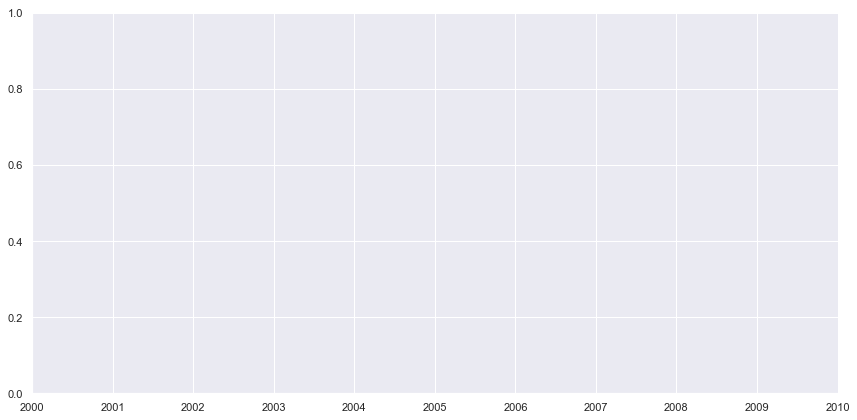

In [28]:
sns.set(style="darkgrid", color_codes=True)

p = sns.set_palette([
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.706, 0.459, 0.937)
])

f = sns.lmplot("dt", "max_pm25", hue="aqi_bucket", data=m, aspect=2, size=6)
#f = sns.scat(x="year", y="count", hue="aqi_bucket", data=s, kind="bar", aspect=2, size=6
#               , hue_order=['Good','Moderate','Unhealthy for Sensitive Groups','Unhealthy','Very Unhealthy','Hazardous'
#                            ,'Literally off the charts']
#               , palette=p
#               , legend=False
#              )

plt.title('\nNumber of days falling into each AQI bucket, by year\n', size=20)
plt.xlabel('Year', size=15)
plt.ylabel('Count of Days', size=15)
plt.xticks(size=13)
plt.yticks(size=13)
plt.legend(loc='center right', bbox_to_anchor=(1.35, 0.5), fontsize=15)

How about the *__share__* of each category of days?

In [29]:
c.sum(axis=1)

year
2008    212.0
2009    301.0
2010    351.0
2011    354.0
2012    355.0
2013    365.0
2014    365.0
2015    365.0
2016    366.0
2017    181.0
dtype: float64

# China Vitae data

In [32]:
filename = 'C:data/activity_titles_countries.json'
with open(filename, 'r') as f:
    cv = json.load(f)
print(len(cv)) # 16695 items
cv[0]

16695


{'date': 'February 03, 2019',
 'activity': 'Zhang Youxia calls for support of strengthening and revitalizing armed forces ',
 'location': 'Beijing Municipality',
 'attendees': ['Zhang Youxia'],
 'attendees_links': ['index.php?mode=events&type=cv&id=4098'],
 'source': 'XINHUA Online (English 2010)',
 'topics': ['domestic politics', 'military'],
 'foreign_officials': [],
 'activity_id': 0,
 'matched_countries': [],
 'matched_on': []}

In [33]:
huxi = []
for record in cv:
    # condition (1): xi or hu
    if any("xi jinping" in a.lower() for a in record['attendees']) or any("hu jintao" in a.lower() for a in record['attendees']):
        
        # condition (2): at least 2 attendees
        if len(record['attendees']) > 1:  
            
            # condition (3): at least 1 foreign official
            if len(record['foreign_officials']) > 0: 
                
                # condition (4): meeting actually occurred in beijing
                if "phone" not in record['activity'].lower():
                    if "leave" not in record['activity'].lower():
                        if "send" not in record['activity'].lower():
                            if "congratulat" not in record['activity'].lower():
                                if "condolence" not in record['activity'].lower():
                                    if "message" not in record['activity'].lower():
                                        if "greeting" not in record['activity'].lower():
                                            if "return" not in record['activity'].lower():
                                                if "anniversar" not in record['activity'].lower():
                                                    huxi.append(record)
                                                        
print('len of huxi: ', len(huxi)) # 1122 --> 1120 --> 1104 records
print(huxi[0])

len of huxi:  1104
{'date': 'November 09, 2017', 'activity': 'Xi Jinping hosts welcome ceremony for Donald Trump in Beijing ', 'location': 'Beijing Municipality', 'attendees': ['Xi Jinping', '\n\t\t\t\t\tDonald Trump'], 'attendees_links': ['index.php?mode=events&type=cv&id=303', 'index.php?mode=events&type=ncv&sn=Trump&gn=Donald'], 'source': 'XINHUA Online (China View)', 'topics': ['foreign relations'], 'foreign_officials': [{'name': 'Donald Trump', 'title': 'U.S. President'}], 'activity_id': 35, 'matched_countries': ['united states'], 'matched_on': ['nationality']}


In [34]:
huxi_matched = []
huxi_unmatched = []

for record in huxi:
    # condition (5): matched on country name
    if len(record['matched_countries']) > 0:
        huxi_matched.append(record)
    else:
        huxi_unmatched.append(record)

print('len of huxi_matched: ', len(huxi_matched)) # 973 --> 999
print('len of huxi_unmatched: ', len(huxi_unmatched)) # 131 --> 105

len of huxi_matched:  999
len of huxi_unmatched:  105


In [28]:
huxi_unmatched

[{'date': 'March 16, 2015',
  'activity': 'Xi meets with Harvard president in Beijing',
  'location': 'Beijing Municipality',
  'attendees': ['Xi Jinping', '\n\t\t\t\t\tCatharine Drew Gilpin Faust'],
  'attendees_links': ['index.php?mode=events&type=cv&id=303',
   'index.php?mode=events&type=ncv&sn=Faust&gn=Catharine Drew Gilpin'],
  'source': 'XINHUA Online (China View)',
  'topics': ['education', 'foreign relations'],
  'foreign_officials': [{'name': 'Catharine Drew Gilpin Faust',
    'title': 'President of Harvard University'}],
  'activity_id': 129,
  'matched_countries': [],
  'matched_on': []},
 {'date': 'November 19, 2013',
  'activity': 'Chinese president meets International Olympic Committee chief Thomas Bach #China',
  'location': 'Beijing Municipality',
  'attendees': ['Xi Jinping', '\n\t\t\t\t\tThomas Bach'],
  'attendees_links': ['index.php?mode=events&type=cv&id=303',
   'index.php?mode=events&type=ncv&sn=Bach&gn=Thomas'],
  'source': 'XINHUA Online (China View)',
  'topi

suriname mispelled, 1320, 4028 ('surinam')
namibia mispelled, 1801, 3142 ('nambia')
argentina mispelled, 14100 ('argentiina')
kazakhstan misspelled, 6543 ('kazakstan')

workers party of korea, 3194 - DONE
Cote d'Ivoire, 8097, 15475 - DONE
cape verde, 1899, 15519 - DONE
syria, 1729 - DONE
kmt, 3986 - DONE
Belarussian, 12147 - DONE

duke of cambridge, 11507
missing political parties in other countries other than taiwan (i.e. japan, vietnam)
US state leaders like brandstad and jerry brown

#### Definition of `huxi`
1. contains huxi in the list of attendees (plus wen jiaobao and li keqiang)
2. number of attendees > 1
3. number of foreign officials attending > 0 
4. filter out meetings that did not occur in beijing: records with "phone" or "send" or "leave" or "congratulat" or "condolence" or "message" or "greeting" or "return" or "anniversar" 
5. official's title contains a country name 

#### Other to do:
- also add records for li keqiang, wen jiabao (and jiang zemin?) 
- convert strings to dates
- order dicts in fp by date

In [3]:
i = 0
for record in cv:
    i += 1
    if any("foreign" in t for t in record['topics']):
        if len(record['attendees']) > 1:
            print(i)
            print('***Topics: ', record['topics'])
            print('***Attendees: ', record['attendees'])
            title = record['activity']
            attendees = record['attendees']
            date =  record['date']
            location = record['location']
            topics = record['topics']
            source = record['source']
    #print([t for t in record['topics'] if "foreign" in t])
    if i == 30:
        break

17
***Topics:  ['foreign relations']
***Attendees:  ['Song Tao', '\n\t\t\t\t\tBorge Brende']
22
***Topics:  ['foreign relations']
***Attendees:  ['Xi Jinping', '\n\t\t\t\t\tDenis Sassou Nguesso', '\n\t\t\t\t\tAntoinette Sassou Nguesso', '\n\t\t\t\t\tLiyuan Peng']
25
***Topics:  ['foreign relations']
***Attendees:  ['Ma Kai', '\n\t\t\t\t\tErnest Moniz']


In [4]:
#fp = dict()
fp = list()

i = -1
j = 0
for record in cv:
    i += 1
    new_rec = dict()
    if any("foreign" in t for t in record['topics']):
        if len(record['attendees']) > 1:
            #print(i)
            j += 1
            #print('***Topics: ', record['topics'])
            #print('***Attendees: ', record['attendees'])
            new_rec['title'] = record['activity']
            new_rec['attendees'] = record['attendees']
            new_rec['date'] =  record['date']
            new_rec['location'] = record['location']
            new_rec['tags'] = record['topics']
            new_rec['source'] = record['source']
            new_rec['id'] = j
            #new_rec['id'] = str('id_' + str(j))
            #fp['data'] = new_rec
            #fp[str('id_' + str(j))] = new_rec
            fp.append(new_rec)
            
len(fp) #4397
#fp

4397

In [5]:
fp[:2]

[{'title': 'Song Tao Meets with Norwegian Foreign Minister ',
  'attendees': ['Song Tao', '\n\t\t\t\t\tBorge Brende'],
  'date': 'April 10, 2017',
  'location': 'Beijing Municipality',
  'tags': ['foreign relations'],
  'source': 'International Department Central Committee of CPC',
  'id': 1},
 {'title': 'China to help Republic of Congo diversify economy',
  'attendees': ['Xi Jinping',
   '\n\t\t\t\t\tDenis Sassou Nguesso',
   '\n\t\t\t\t\tAntoinette Sassou Nguesso',
   '\n\t\t\t\t\tLiyuan Peng'],
  'date': 'July 05, 2016',
  'location': 'Beijing Municipality',
  'tags': ['foreign relations'],
  'source': 'XINHUA Online (China View)',
  'id': 2}]

In [6]:
huxi = list()

i = -1
j = -1
r = re.compile("\s")

for record in cv:
    i += 1
    new_rec = dict()
    if any("foreign" in t for t in record['topics']):  # (1)
        if len(record['attendees']) > 1:  # (2)
#             if any("Xi Jinping" in a for a in record['attendees']) or any("Hu Jintao" in a for a in record['attendees']): # (3)
            if any("xi jinping" in a.lower() for a in record['attendees']) or any("hu jintao" in a.lower() for a in record['attendees']): # (3)        
#                 if len(list(filter(r.match, record['attendees']))) > 0: # (4)
#                 if ("phone" not in record['activity'].lower()) and ("leave" not in record['activity'].lower()) and ("send" not in record['activity'].lower()): # (5)
                    j += 1
                    new_rec['title'] = record['activity']#.lower()
                    new_rec['attendees'] = record['attendees'] #[x.lower() for x in record['attendees']]
                    new_rec['date'] =  record['date']
                    new_rec['location'] = record['location']
                    new_rec['tags'] = record['topics']
                    new_rec['source'] = record['source']
                    new_rec['id'] = j
                    huxi.append(new_rec)
            
len(huxi) # 860, should be 884 after adding in (5)

903

In [7]:
j = 0
for i in huxi:
    if "urge" in i['title'].lower():
#     if ("phone" in i['title'].lower()) or ("leave" in i['title'].lower()) or ("send" in i['title'].lower()):
        j += 1
        print(i)
        print('\n')
print(j)

{'title': 'Chinese president meets U.S. defense chief, urges deeper strategic trust', 'attendees': ['Hu Jintao', '\n\t\t\t\t\tRobert Gates'], 'date': 'January 11, 2011', 'location': 'Beijing Municipality', 'tags': ['foreign relations'], 'source': 'XINHUA Online (China View)', 'id': 309}


{'title': 'Chinese vice president urges closer economic, political ties with ROK', 'attendees': ['Xi Jinping', '\n\t\t\t\t\tHak-kyu Sohn'], 'date': 'July 05, 2011', 'location': 'Beijing Municipality', 'tags': ['foreign relations'], 'source': 'XINHUA Online (China View)', 'id': 358}


{'title': 'Chinese vice president urges mutual trust between China-U.S.armed forces', 'attendees': ['Guo Boxiong', 'Xi Jinping', '\n\t\t\t\t\tMike Mullen'], 'date': 'July 11, 2011', 'location': 'Beijing Municipality', 'tags': ['foreign relations', 'military'], 'source': None, 'id': 361}


{'title': "China's VP urges policy coordination amid tumbling world economy", 'attendees': ['Xi Jinping', '\n\t\t\t\t\tRobert Zoellick'

### Extracting nationalities from activity titles, matching with country names

In [8]:
countries = pd.read_csv('c:data/countries_clean.csv')
countries.head()

,num_code,alpha_2_code,alpha_3_code,country,nationality
0,4,AF,AFG,afghanistan,afghan
1,248,AX,ALA,åland islands,åland island
2,8,AL,ALB,albania,albanian
3,12,DZ,DZA,algeria,algerian
4,16,AS,ASM,american samoa,american samoan


In [9]:
ex = huxi[114]
print(ex['title'].lower())
ex

hu jintao met with u.s. treasury secretary henry paulson. 


{'title': 'Hu Jintao met with U.S. Treasury Secretary Henry Paulson. ',
 'attendees': ['Hu Jintao',
  'Chen Deming',
  'Chen Zhu',
  'Li Changjiang',
  'Ma Kai',
  'Sun Zhengcai',
  'Wu Yi',
  'Xie Xuren',
  'Yang Jiechi',
  'Zhou Shengxian',
  'Zhou Xiaochuan',
  '\n\t\t\t\t\tHenry Paulson'],
 'date': 'December 13, 2007',
 'location': 'Beijing Municipality',
 'tags': ['foreign relations'],
 'source': 'XINHUA Online (China View)',
 'id': 114}

In [10]:
ex['title'].lower()

'hu jintao met with u.s. treasury secretary henry paulson. '

In [11]:
#test_dict = huxi[425:430]
test_dict = huxi[75:80]
#test_dict

In [12]:
ex = hx[119]
ex['title'].lower()

tricky_cos = set('republic ')

for country in cos:
    match = re.search(r'\b{}\b'.format(country), ex['title'].lower())
    if match:
        print(match.group(0))
        re.sub()
#         match = re.search(r'\b{}\b'.format(country), ex['title'].lower(), re.I)
#         if match:
#             ex
ex

NameError: name 'hx' is not defined

In [13]:
hx = huxi.copy()
# test_dict = hx[425:430]
# test_dict = hx[350:355]
# test_dict = [hx[119], hx[179], hx[184], hx[448], hx[114]]
xw = pd.DataFrame(countries[['nationality','country']]).to_dict()
nats = xw['nationality'].values()
cos = xw['country'].values()

# for i, act_record in enumerate(test_dict): # FOR TESTING
for i, act_record in enumerate(hx):
    matched_cos = []
    found = -1
    matched_on = None
    for country in cos:
        #if country in act_record['title'].lower():
        matched_on_country = re.search(r'\b{}\b'.format(country), act_record['title'].lower(), re.I)
        if matched_on_country:
            found = 1
            if country not in matched_cos:
                matched_cos.append(matched_on_country.group(0))
            matched_on = 'country'
            
    for nationality in nats:
        if nationality == 'u.s.':
            matched_on_us = re.search(r'u\.s\.', act_record['title'].lower(), re.I)
            if matched_on_us:
                idx = list(xw['nationality'].keys())[list(nats).index(matched_on_us.group(0))]
                co = list(cos)[idx]
                if co not in matched_cos:
                    matched_cos.append(co)
                matched_on = 'nationality'

        else:
            matched_on_nationality = re.search(r'\b{}\b'.format(nationality), act_record['title'].lower(), re.I)
            if matched_on_nationality:
                idx = list(xw['nationality'].keys())[list(nats).index(matched_on_nationality.group(0))]
                co = list(cos)[idx]
                if co not in matched_cos:
                    matched_cos.append(co)
                matched_on = 'nationality'
 
    #print('Found Status:', found)
    print(i, 'matched_cos:', matched_cos)
    act_record['matched_countries'] = matched_cos
    act_record['matched_on'] = matched_on
    
# hx[796]

0 matched_cos: ['republic of congo']
1 matched_cos: ['russia']
2 matched_cos: ['laos']
3 matched_cos: []
4 matched_cos: ['sudan']
5 matched_cos: ['russia']
6 matched_cos: ['kyrgyzstan']
7 matched_cos: ['united kingdom']
8 matched_cos: ['portugal']
9 matched_cos: ['romania']
10 matched_cos: ['togo']
11 matched_cos: ['myanmar']
12 matched_cos: ['pakistan']
13 matched_cos: ['germany']
14 matched_cos: ['switzerland']
15 matched_cos: ['russia']
16 matched_cos: ['russia']
17 matched_cos: ['brazil']
18 matched_cos: ['japan']
19 matched_cos: ['turkmenistan']
20 matched_cos: ['yemen']
21 matched_cos: ['georgia']
22 matched_cos: []
23 matched_cos: ['russia']
24 matched_cos: ['germany']
25 matched_cos: ['namibia']
26 matched_cos: []
27 matched_cos: ['kyrgyzstan']
28 matched_cos: ['afghanistan']
29 matched_cos: ['senegal']
30 matched_cos: ['laos']
31 matched_cos: ['japan']
32 matched_cos: ["democratic people's republic of korea", 'dprk', 'republic of korea']
33 matched_cos: []
34 matched_cos: ['sw

560 matched_cos: []
561 matched_cos: []
562 matched_cos: ['venezuela']
563 matched_cos: ['united states']
564 matched_cos: ['france']
565 matched_cos: ['rok', 'republic of korea']
566 matched_cos: ['bangladesh']
567 matched_cos: ['saudi arabia']
568 matched_cos: []
569 matched_cos: ['brunei']
570 matched_cos: ['mongolia']
571 matched_cos: []
572 matched_cos: ['france']
573 matched_cos: ['united states']
574 matched_cos: ['iceland']
575 matched_cos: ['nepal']
576 matched_cos: []
577 matched_cos: ['united states']
578 matched_cos: ['united states']
579 matched_cos: ['france']
580 matched_cos: ['france']
581 matched_cos: ['france']
582 matched_cos: ['palestine']
583 matched_cos: ['palestine']
584 matched_cos: []
585 matched_cos: ['russia']
586 matched_cos: []
587 matched_cos: ['mozambique']
588 matched_cos: ['ireland']
589 matched_cos: ['greece']
590 matched_cos: ['saudi arabia']
591 matched_cos: ['tajikistan']
592 matched_cos: ['dprk']
593 matched_cos: ['united states']
594 matched_cos: 

In [87]:
hx[899]

{'title': 'Opening up of China means win-win cooperation for world',
 'attendees': ['Xi Jinping',
  'Liu Yandong',
  'Ma Kai',
  'Wang Yi',
  'Yang Jiechi',
  '\n\t\t\t\t\tJim Breyer',
  '\n\t\t\t\t\tHenry Paulson',
  '\n\t\t\t\t\tStephen Schwarzman',
  '\n\t\t\t\t\tTim Cook',
  '\n\t\t\t\t\tMark Zuckerberg'],
 'date': 'October 30, 2017',
 'location': 'Beijing Municipality',
 'tags': ['domestic politics',
  'education',
  'foreign relations',
  'science/technology'],
 'source': 'XINHUA Online (China View)',
 'id': 899,
 'matched_countries': [],
 'matched_on': None}

#israelpalestine, 584 --> get country name (and title) from scraping officials page?

S. Africa, 636
S. Korea, 610
"Central Africa", 209
"eygpt" mispelled... 453

"hillary" 482
"putin", 497

Filter for no foreign visitors:
- 661, no foreign visitors, just matching on country names - DONE

Edge cases:
- ROK/South Korea, for example, matching on "Republic of Korea (ROK)" so happens twice, 119

- "republic of korea" and "democratic peoples republic of korea", 179 
- "republic of (the) congo" and "democratic republic of (the) congo" 
- "guinea" and "equatorial guinea" and "guinea bissau" and "papua new guinea", 184, 770, 755. 523
- "sudan" and "south sudan", 448, 476 

Not matching on:
- "U.S." not matching 114, 757, 350 --> another edge case, need to match on a diff regex expression for "U.S." -- DONE
- maybe do the same with ROK and DPRK? - DONE
- add "us" to Excel? but how many false matches will that yield? hopefully not too many - DONE
- "UK", 740 --> add "UK" to Excel spreadsheet - DONE
- check for all abbreviations with/without periods - DONE

Add/delete from Excel countries spreadsheet:
- 681, russia/russian federation being matched twice --> remove "russian federation" - DONE
- Laos/Lao pdr, 666 --> remove "lao PDR" and "Lao" as country from Excel spreadsheet - DONE
- micronesia (has a space...) --> remove extra spaces in Excel with =TRIM() function - DONE
- 616, "venezuela " has an extra space in it --> =TRIM() func - DONE

Tough cases:
- 434, "dprk" and "rok", but only meeting with one foreign official, which korea is it?? - need to pull out official name... - DONE
- 321, false match on libya (should just be france) - need to pull out official name... - DONE

- 782, REALLY TOUGH case, not a foreign visitor but instead liyuan peng, but matched on 2 countries! - DONE
- 349, had a phone conversation with biden but he wasn't in beijing!! - DONE

Careful with titles that contain "send" or "call" or "phone" "leaves" --> filter these out? - DONE
Also check records where no country/nationality is matched (create huxi_match_success, huxi_match_fail)
Filter out duplicate news stories for events on same day
Pull out titles like "minister" "president" "ambassador" "senator" "prince" "duke", to add to 'attendee_titles'

In [297]:
hx[898] 

{'title': 'Xi, Trump agree on leading role of head-of-state diplomacy in Sino-U.S. ties',
 'attendees': ['Xi Jinping',
  'Cai Qi',
  'Liu Yandong',
  'Wang Yang',
  'Wang Yi',
  'Yang Jiechi',
  '\n\t\t\t\t\tDonald Trump'],
 'date': 'November 09, 2017',
 'location': 'Beijing Municipality',
 'tags': ['foreign relations'],
 'source': 'XINHUA Online (China View)',
 'id': 899,
 'matched_countries': []}

In [27]:
test_dict

[{'title': 'President Hu Jintao Returns to Beijing after Eurasia Tour ',
  'attendees': ['Hu Jintao', 'Dai Bingguo', 'Ling Jihua', 'Wang Huning'],
  'date': 'June 21, 2011',
  'location': 'Beijing Municipality',
  'tags': ['foreign relations'],
  'source': 'Ministry of Foreign Affairs, PRC',
  'id': 351,
  'matched_countries': []},
 {'title': 'Chinese president sends condolences to Russian counterpart over fatal plane crash',
  'attendees': ['Hu Jintao', '\n\t\t\t\t\tDmitry Medvedev'],
  'date': 'June 21, 2011',
  'location': 'Beijing Municipality',
  'tags': ['foreign relations'],
  'source': 'Ministry of Defense (English)',
  'id': 352,
  'matched_countries': ['russian federation']},
 {'title': 'Chinese vice president meets Cambodian deputy prime minister',
  'attendees': ['Xi Jinping', '\n\t\t\t\t\tTea Banh'],
  'date': 'June 21, 2011',
  'location': 'Beijing Municipality',
  'tags': ['foreign relations'],
  'source': 'XINHUA Online (China View)',
  'id': 353,
  'matched_countries':

In [29]:
#test_dict = hx[795:800]
for activity in test_dict:
    r = re.compile("\s")
    if len(list(filter(r.match, activity['attendees']))) > 0: # foreign officials present
        activity['foreign_officials_present'] = True
    else: 
        activity['foreign_officials_present'] = False
    #print(activity['attendees'])
    
test_dict

[{'title': 'President Hu Jintao Returns to Beijing after Eurasia Tour ',
  'attendees': ['Hu Jintao', 'Dai Bingguo', 'Ling Jihua', 'Wang Huning'],
  'date': 'June 21, 2011',
  'location': 'Beijing Municipality',
  'tags': ['foreign relations'],
  'source': 'Ministry of Foreign Affairs, PRC',
  'id': 351,
  'matched_countries': [],
  'foreign_officials_present': False},
 {'title': 'Chinese president sends condolences to Russian counterpart over fatal plane crash',
  'attendees': ['Hu Jintao', '\n\t\t\t\t\tDmitry Medvedev'],
  'date': 'June 21, 2011',
  'location': 'Beijing Municipality',
  'tags': ['foreign relations'],
  'source': 'Ministry of Defense (English)',
  'id': 352,
  'matched_countries': ['russian federation'],
  'foreign_officials_present': True},
 {'title': 'Chinese vice president meets Cambodian deputy prime minister',
  'attendees': ['Xi Jinping', '\n\t\t\t\t\tTea Banh'],
  'date': 'June 21, 2011',
  'location': 'Beijing Municipality',
  'tags': ['foreign relations'],
  

#### Constructing a definitive list of country names (non-repeating, like Lao/Lao PDR, etc)

In [304]:
countries.head()
countries[countries.country.str.contains('republic')]
countries[countries.country.str.contains('guin')]
# countries[countries.country.str.contains('peopl')]
# countries[countries.country.str.contains('korea')]
# countries[countries.country.str.contains('sud')]
# countries

,num_code,alpha_2_code,alpha_3_code,country,nationality
77,226,GQ,GNQ,equatorial guinea,equatorial guinean
78,226,GQ,GNQ,equatorial guinea,equatoguinean
105,324,GN,GIN,guinea,guinean
106,624,GW,GNB,guinea-bissau,bissau-guinean
209,598,PG,PNG,papua new guinea,papua new guinean
210,598,PG,PNG,papua new guinea,papuan


In [345]:
country_labels = countries.copy()
cl = pd.DataFrame(country_labels.groupby(['num_code', 'country']).size()).reset_index()#[25:]#.reset_index()#['num_code','country']
cl = cl.rename(columns={cl.columns[2]:'cnt'})
cl[cl.cnt > 1]

,num_code,country,cnt
7,28,antigua and barbuda,2
8,31,azerbaijan,2
18,60,bermuda,2
21,70,bosnia and herzegovina,2
22,72,botswana,2
48,174,comoros,2
60,204,benin,2
66,226,equatorial guinea,2
72,239,south georgia and the south sandwich islands,2
89,300,greece,2


In [372]:
cl = country_labels.drop_duplicates(subset='country')
cl[cl.num_code == 180]

,num_code,alpha_2_code,alpha_3_code,country,nationality
59,180,CD,COD,democratic republic of the congo,congolese
60,180,CD,COD,democratic republic of congo,congolese


In [364]:
cl = country_labels.groupby(['num_code']).size()
cl = pd.DataFrame({'num_code':cl.index, 'count':cl.values})
cl

,num_code,count
0,4,1
1,8,1
2,10,1
3,12,1
4,16,1
5,20,1
6,24,1
7,28,2
8,31,2
9,32,1


In [334]:
countries[countries.num_code == 180]

,num_code,alpha_2_code,alpha_3_code,country,nationality
59,180,CD,COD,democratic republic of the congo,congolese
60,180,CD,COD,democratic republic of congo,congolese


#### Testing randomly
International bodies to add later:
* 773: UN (need to add list of international bodies!)
* 79: no country or nationality name! (seems like should be japan)
* 341: EC
* 340: EU
* 348: "SADC"??
* 359: "european parties"
* 407: APEC (also include ASEAN) - compare with EU/EC, African Union, Latin American union
* 415: International Labor Organization
* BRICS
* SCO

### Problems with "source" field/"tags" fields getting messed

In [43]:
cv.groupby(cv.source).size().sort_index()#.str.contains('foreign')

source
Beijing Olympics                                         9
CHINA DAILY (Government)                                 1
CPC PEOPLE (English)                                     3
CRI Online                                              32
Central People's Government, PRC                       495
China Daily                                              1
China Military Online                                  134
China News                                              12
Health                                                   1
International Department Central Committee of CPC      409
Ministry of Defense (English)                          247
Ministry of Foreign Affairs, PRC                       423
People's Daily Online                                  183
XINHUA Online (China View)                           10440
XINHUA Online (English 2010)                           293
business                                               146
china.com.cn                                     